In [2]:
import os
import sys
import glob
import numpy as np
from tqdm import trange
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.units as u
import astropy.coordinates as coord
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Column
from tqdm import trange
import pandas as pd
import fitsio
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from easyquery import Query, QueryMaker
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm
import h5py
from astropy.cosmology import Planck18
import glob
from matplotlib.lines import Line2D

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

rootdir = '/global/u1/v/virajvm/'
sys.path.append(os.path.join(rootdir, 'DESI2_LOWZ/desi_dwarfs/code'))

from desi_lowz_funcs import make_subplots, match_c_to_catalog, print_radecs
from desi_lowz_funcs import calc_normalized_dist
from desi_lowz_funcs import find_objects_nearby, _n_or_more_lt, get_remove_flag
from construct_dwarf_galaxy_catalogs import process_sga_matches


SyntaxError: invalid syntax (construct_dwarf_galaxy_catalogs.py, line 1128)

In [ ]:
    

    ## now we look at the fraction of objects that are classified as fragments by the fracflux cut AND the PCNN!
    #load the shredded cat and check these numbers add up ... 
    
    # shred_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_catalog_v3.fits")
    
    # print(f"In shredded cat, BGS_BRIGHT={len(shred_cat[shred_cat['SAMPLE'] == 'BGS_BRIGHT'  ])}, BGS_FAINT={len(shred_cat[shred_cat['SAMPLE'] == 'BGS_FAINT'  ])}, ELG={len(shred_cat[shred_cat['SAMPLE'] == 'ELG'  ])}, LOWZ={len(shred_cat[shred_cat['SAMPLE'] == 'LOWZ'  ])}")
    
    # print(f"In plotting catalog, BGS_BRIGHT={len(bgsb_dwarfs[shred_bgsb_mask])}, BGS_FAINT={len(bgsf_dwarfs[shred_bgsf_mask])}, ELG={len(elg_dwarfs[shred_elg_mask])}, LOWZ={len(lowz_dwarfs[shred_lowz_mask])} ")

    # #let us confirm that they are in the same order!
    # print(  np.max(  np.abs( shred_cat[shred_cat['SAMPLE'] == 'BGS_BRIGHT']["TARGETID"].data - bgsb_dwarfs[shred_bgsb_mask]["TARGETID"].data ) ))
    # print(  np.max(  np.abs( shred_cat[shred_cat['SAMPLE'] == 'BGS_FAINT']["TARGETID"].data - bgsf_dwarfs[shred_bgsf_mask]["TARGETID"].data ) )) 
    # print(  np.max(  np.abs( shred_cat[shred_cat['SAMPLE'] == 'ELG']["TARGETID"].data - elg_dwarfs[shred_elg_mask]["TARGETID"].data ) )) 
    # print(  np.max(  np.abs( shred_cat[shred_cat['SAMPLE'] == 'LOWZ']["TARGETID"].data - lowz_dwarfs[shred_lowz_mask]["TARGETID"].data ) )) 
    
    # # #we need the mask to include the pcnn cut, let us just initialize an array of zeros
    # bgsb_dwarfs_pcnn = np.zeros(len(bgsb_dwarfs))
    # bgsf_dwarfs_pcnn = np.zeros(len(bgsf_dwarfs))
    # elg_dwarfs_pcnn = np.zeros(len(elg_dwarfs))
    # lowz_dwarfs_pcnn = np.zeros(len(lowz_dwarfs))

    # #now we fill this with pcnn values for just shredded objects
    # bgsb_dwarfs_pcnn[ shred_bgsb_mask ] = shred_cat[shred_cat['SAMPLE'] == 'BGS_BRIGHT']["PCNN_FRAGMENT"].data
    # bgsf_dwarfs_pcnn[ shred_bgsf_mask ] = shred_cat[shred_cat['SAMPLE'] == 'BGS_FAINT']["PCNN_FRAGMENT"].data
    # elg_dwarfs_pcnn[ shred_elg_mask ] = shred_cat[shred_cat['SAMPLE'] == 'ELG']["PCNN_FRAGMENT"].data
    # lowz_dwarfs_pcnn[ shred_lowz_mask ] = shred_cat[shred_cat['SAMPLE'] == 'LOWZ']["PCNN_FRAGMENT"].data

    # PCNN_CUT = 0.4

    # # #and now we can use this in the mask!
    # print( len(bgsb_dwarfs[shred_bgsb_mask]), len(bgsb_dwarfs[shred_bgsb_mask & (bgsb_dwarfs_pcnn >= PCNN_CUT)] )  )
    # print( len(bgsf_dwarfs[shred_bgsf_mask]), len(bgsf_dwarfs[shred_bgsf_mask&(bgsf_dwarfs_pcnn >= PCNN_CUT)]  ) )
    # print( len(elg_dwarfs[shred_elg_mask]), len(elg_dwarfs[shred_elg_mask&(elg_dwarfs_pcnn >= PCNN_CUT)]   ) )
    # print( len(lowz_dwarfs[shred_lowz_mask]), len(lowz_dwarfs[shred_lowz_mask&(lowz_dwarfs_pcnn >= PCNN_CUT)] ) )
    



In [6]:
bgsb_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_bgs_bright_filter_zsucc_zrr02_allfracflux.fits")
bgsf_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_bgs_faint_filter_zsucc_zrr03_allfracflux.fits")
elg_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_elg_filter_zsucc_zrr05_allfracflux.fits")
lowz_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_lowz_filter_zsucc_zrr03.fits")

dwarf_mask_bgsb = (bgsb_list["LOGM_SAGA_FIDU"] < 9.25) & (bgsb_list["STARFDIST"] > 1)
dwarf_mask_bgsf = (bgsf_list["LOGM_SAGA_FIDU"] < 9.25) & (bgsf_list["STARFDIST"] > 1)
dwarf_mask_lowz = (lowz_list["LOGM_SAGA_FIDU"] < 9.25) & (lowz_list["STARFDIST"] > 1)
dwarf_mask_elg = (elg_list["LOGM_SAGA_FIDU"] < 9.25)   & (elg_list["STARFDIST"] > 1)

bgsb_dwarfs = bgsb_list[dwarf_mask_bgsb]
bgsf_dwarfs = bgsf_list[dwarf_mask_bgsf]
elg_dwarfs = elg_list[dwarf_mask_elg]
lowz_dwarfs = lowz_list[dwarf_mask_lowz]


#identifying the objects that are likely shreds 
fracflux_grz = [f"FRACFLUX_{b}" for b in "GRZ"]

remove_queries = [Query(_n_or_more_lt(fracflux_grz, 2, 0.2)) ]

# note that the this is n_or_more_LT!! so be careful about that!
#these are masks for objects that did not satisfy the above condition!
shred_bgsb_mask = get_remove_flag(bgsb_dwarfs, remove_queries) == 0
shred_bgsf_mask = get_remove_flag(bgsf_dwarfs, remove_queries) == 0
shred_elg_mask = get_remove_flag(elg_dwarfs, remove_queries) == 0
shred_lowz_mask = get_remove_flag(lowz_dwarfs, remove_queries) == 0

In [7]:

## PLOTTING THE FRACTION OF GALAXIES THAT ARE LIKELY SHREDS/BAD PHOTOMETRY
zgrid = np.arange(-0.01/2,0.125,0.01)
#the stellar mass bins of 0.5 dex
mstar_grid = np.arange(5.5, 10,0.5)
magr_grid = np.arange(17.5, 23,0.5)
    
zcens = 0.5*(zgrid[1:] + zgrid[:-1])
ms_cens = 0.5*(mstar_grid[1:] + mstar_grid[:-1])
mr_cens = 0.5*(magr_grid[1:] + magr_grid[:-1])


In [9]:
def get_shred_frac(tot_cat, subset_mask,  low, hi, rel_col="Z"):
    '''
    Given the total catalog and mask of objects to look at, computes the fraction in an interval of the relevant column (e.g., redshift or stellar mass)
    '''

    tot_count_bin = len(tot_cat[(tot_cat[rel_col]< hi) & (tot_cat[rel_col] > low)  ])
    subset_count_bin = len(tot_cat[(tot_cat[rel_col]< hi) & (tot_cat[rel_col] > low) & subset_mask  ])

    ##adopt some minimum count here, also show some error here??
    
    if tot_count_bin > 20:
        return subset_count_bin / tot_count_bin
    else:
        return np.nan

#these are the fraction of objects as a function of redshift that are classified as likely fragments by just the FRACFLUX cut!
shred_frac_bgsb_1 = []
shred_frac_bgsf_1 = []
shred_frac_elg_1 = []
shred_frac_lowz_1 = []

for i in trange(len(zgrid)-1):
    zlow = zgrid[i]
    zhi = zgrid[i+1]

    shred_frac_bgsb_1.append(   get_shred_frac(bgsb_dwarfs, shred_bgsb_mask ,zlow, zhi, rel_col = "Z" )  ) 
    shred_frac_bgsf_1.append(   get_shred_frac(bgsf_dwarfs, shred_bgsf_mask, zlow, zhi, rel_col = "Z")  ) 
    shred_frac_elg_1.append(   get_shred_frac(elg_dwarfs, shred_elg_mask, zlow, zhi, rel_col = "Z")  ) 
    shred_frac_lowz_1.append(   get_shred_frac(lowz_dwarfs, shred_lowz_mask, zlow, zhi, rel_col = "Z")  ) 



shred_frac_bgsb_ms = []
shred_frac_bgsf_ms = []
shred_frac_elg_ms = []
shred_frac_lowz_ms = []

for i in trange(len(mstar_grid)-1):
    mlow = mstar_grid[i]
    mhi = mstar_grid[i+1]

    shred_frac_bgsb_ms.append(   get_shred_frac(bgsb_dwarfs, shred_bgsb_mask ,mlow, mhi, rel_col = "LOGM_SAGA_FIDU" )  ) 
    shred_frac_bgsf_ms.append(   get_shred_frac(bgsf_dwarfs, shred_bgsf_mask, mlow, mhi, rel_col = "LOGM_SAGA_FIDU")  ) 
    shred_frac_elg_ms.append(   get_shred_frac(elg_dwarfs, shred_elg_mask , mlow, mhi, rel_col = "LOGM_SAGA_FIDU")  ) 
    shred_frac_lowz_ms.append(   get_shred_frac(lowz_dwarfs, shred_lowz_mask, mlow, mhi, rel_col = "LOGM_SAGA_FIDU")  ) 


shred_frac_bgsb_magr = []
shred_frac_bgsf_magr = []
shred_frac_elg_magr = []
shred_frac_lowz_magr = []

for i in trange(len(magr_grid)-1):
    rlow = magr_grid[i]
    rhi = magr_grid[i+1]

    shred_frac_bgsb_magr.append(   get_shred_frac(bgsb_dwarfs, shred_bgsb_mask ,rlow, rhi, rel_col = "MAG_R" )  ) 
    shred_frac_bgsf_magr.append(   get_shred_frac(bgsf_dwarfs, shred_bgsf_mask, rlow, rhi, rel_col = "MAG_R")  ) 
    shred_frac_elg_magr.append(   get_shred_frac(elg_dwarfs, shred_elg_mask , rlow, rhi, rel_col = "MAG_R"  ) ) 
    shred_frac_lowz_magr.append(   get_shred_frac(lowz_dwarfs, shred_lowz_mask, rlow, rhi, rel_col = "MAG_R")  ) 



100%|██████████| 10/10 [00:01<00:00,  6.24it/s]


In [10]:
sample_colors = {"BGS_BRIGHT" : "#882255", "BGS_FAINT": "#CC6677", "LOWZ":"#DDCC77", "ELG": "#88CCEE" }


In [17]:
all_sweeps = glob.glob("/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-150*")

In [18]:
all_fracflux_g = []
all_fracflux_r = []
all_fracflux_z = []
all_rmags = []

for i in trange(len(all_sweeps)):

    sweep_data = fits.open(all_sweeps[i])
    sweep_data = sweep_data[1].data

    print(len(sweep_data))
    sweep_data = sweep_data[ sweep_data["TYPE"]  != "PSF" ]
    print(len(sweep_data))
    print("---")
    fracflux_g = sweep_data["FRACFLUX_G"]
    fracflux_r = sweep_data["FRACFLUX_R"]
    fracflux_z = sweep_data["FRACFLUX_Z"]

    all_fracflux_g.append(fracflux_g)
    all_fracflux_r.append(fracflux_r)
    all_fracflux_z.append(fracflux_z)

    all_rmags.append( 22.5 - 2.5*np.log10(sweep_data["FLUX_R"]  ) )


all_fracflux_g = np.concatenate(all_fracflux_g)
all_fracflux_r = np.concatenate(all_fracflux_r)
all_fracflux_z = np.concatenate(all_fracflux_z)
all_rmags = np.concatenate(all_rmags)



  0%|          | 0/15 [00:00<?, ?it/s]

2001531


/tmp/ipykernel_185555/1013673108.py:23: RuntimeWarning: divide by zero encountered in log10
  all_rmags.append( 22.5 - 2.5*np.log10(sweep_data["FLUX_R"]  ) )
/tmp/ipykernel_185555/1013673108.py:23: RuntimeWarning: invalid value encountered in log10
  all_rmags.append( 22.5 - 2.5*np.log10(sweep_data["FLUX_R"]  ) )
  7%|▋         | 1/15 [00:06<01:30,  6.46s/it]

1010840
---
3564119
2196850
---


 13%|█▎        | 2/15 [00:17<01:59,  9.18s/it]

4163748
2522279
---


 20%|██        | 3/15 [00:31<02:16, 11.34s/it]

193775


 27%|██▋       | 4/15 [00:32<01:18,  7.14s/it]

81179
---
2863262


 33%|███▎      | 5/15 [00:41<01:17,  7.80s/it]

1365234
---
3633022


 40%|████      | 6/15 [00:52<01:20,  8.90s/it]

2254317
---
2693119


 47%|████▋     | 7/15 [01:00<01:10,  8.80s/it]

1613735
---
3966667


 53%|█████▎    | 8/15 [01:13<01:09,  9.91s/it]

2454926
---
3443122


 60%|██████    | 9/15 [01:23<01:01, 10.23s/it]

2105385
---


 67%|██████▋   | 10/15 [01:24<00:35,  7.14s/it]

30135
17853
---
63
40
---
4070265


 80%|████████  | 12/15 [01:37<00:20,  6.81s/it]

2465858
---
3851110


 87%|████████▋ | 13/15 [01:48<00:16,  8.07s/it]

2416319
---
3682266


 93%|█████████▎| 14/15 [02:00<00:08,  8.93s/it]

2305058
---
451716


100%|██████████| 15/15 [02:01<00:00,  8.11s/it]

229103
---


In [19]:
len(all_rmags)

23038976

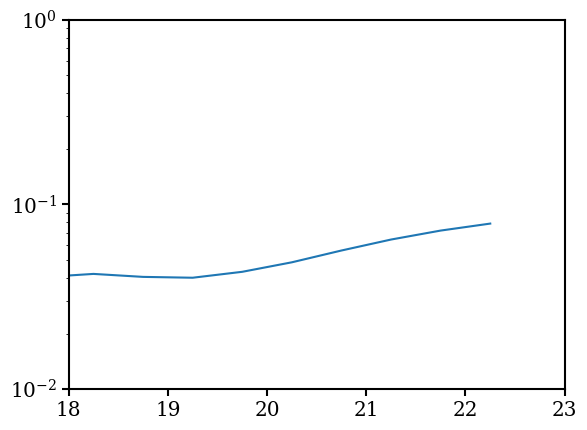

In [20]:
## in bins of magnitude, find the fraction of objects that have 2 or more fracflux less than 0.2

# Example: define bin edge
bins = np.arange(17, 23, 0.5)  # adjust as appropriate

# Count how many bands are < 0.2 for each object
n_low = ((all_fracflux_g < 0.2).astype(int)
         + (all_fracflux_r < 0.2).astype(int)
         + (all_fracflux_z < 0.2).astype(int))

# True/False mask of objects with ≥2 low bands
mask_two_or_more = (n_low >= 2)

# digitize magnitudes into bins
bin_idx = np.digitize(all_rmags, bins)

# total counts in each magnitude bin
tot_per_bin = np.bincount(bin_idx, minlength=len(bins)+1)

# counts of objects that satisfy the condition in each bin
sel_per_bin = np.bincount(bin_idx[mask_two_or_more], minlength=len(bins)+1)

# fraction per bin
fraction = sel_per_bin / tot_per_bin


bin_centers = 0.5*(bins[:-1] + bins[1:])
fraction = fraction[1:len(bins)]   # ignore the overflow bin at the end

plt.plot(bin_centers, 1 - fraction,)
plt.yscale("log")
plt.ylim([1e-2,1])
plt.xlim([18,23])
plt.show()

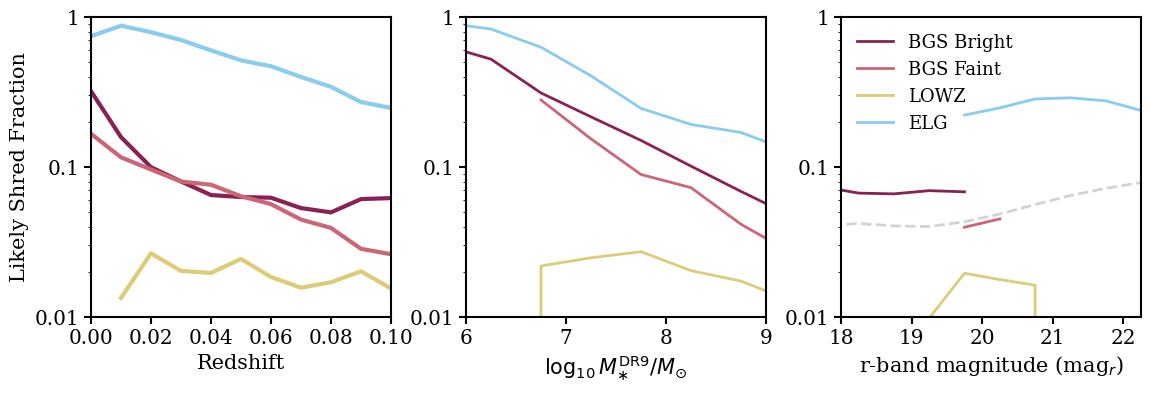

In [30]:

from desi_lowz_funcs import make_subplots

fig,ax = make_subplots(ncol = 3, nrow = 1,return_fig=True,col_spacing=0.75)

ax[0].plot(zcens, shred_frac_bgsb_1,label = "BGS Bright",lw = 3,color = sample_colors["BGS_BRIGHT"],ls = "-")
ax[0].plot(zcens, shred_frac_bgsf_1,label = "BGS Faint",lw = 3,color = sample_colors["BGS_FAINT"],ls = "-")
ax[0].plot(zcens, shred_frac_lowz_1,label = "LOWZ",lw = 3,color = sample_colors["LOWZ"],ls = "-")
ax[0].plot(zcens, shred_frac_elg_1,label = "ELG",lw = 3,color = sample_colors["ELG"],ls = "-")

ls = "-"
lw = 2

ax[1].plot(ms_cens, shred_frac_bgsb_ms,ls= ls,lw = lw,color = sample_colors["BGS_BRIGHT"])
ax[1].plot(ms_cens, shred_frac_bgsf_ms,ls= ls,lw = lw,color = sample_colors["BGS_FAINT"])
ax[1].plot(ms_cens, shred_frac_lowz_ms,ls= ls,lw = lw,color = sample_colors["LOWZ"])
ax[1].plot(ms_cens, shred_frac_elg_ms,ls= ls,lw = lw,color = sample_colors["ELG"])


ax[2].plot(bin_centers, 1- fraction, ls = "--", lw = lw, color = "lightgrey")
ax[2].plot(mr_cens, shred_frac_bgsb_magr,ls= ls,lw = lw,label = "BGS Bright",color = sample_colors["BGS_BRIGHT"])
ax[2].plot(mr_cens, shred_frac_bgsf_magr,ls= ls,lw = lw,label = "BGS Faint",color = sample_colors["BGS_FAINT"])
ax[2].plot(mr_cens, shred_frac_lowz_magr,ls= ls,lw = lw,label = "LOWZ",color = sample_colors["LOWZ"])
ax[2].plot(mr_cens, shred_frac_elg_magr,ls= ls,lw = lw,label = "ELG",color = sample_colors["ELG"])



ax[2].legend(fontsize = 13,ncol = 1)

ax[0].set_xlim([0,0.1])
ax[1].set_xlim([6,9])
ax[2].set_xlim([18,22.25])
ax[0].set_xticks([])

import matplotlib.ticker as mticker

for axi in ax:
    ax[0].set_ylabel(r"Likely Shred Fraction",fontsize = 15)
    axi.set_ylim([1e-2,1])
    # axi.set_title(r"DESI DR1, $M^{\rm DR9}_{\ast} < 10^{9.25} M_{\odot}$",fontsize = 15)
    axi.set_yscale("log")
    axi.set_yticks([0.01, 0.1, 1]) 
    axi.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3g'))
    
ax[0].set_xlabel(r"Redshift",fontsize = 15)
ax[1].set_xlabel(r"$\log_{10} M^{\rm DR9}_{\ast} / M_{\odot}$",fontsize = 15)
ax[2].set_xlabel(r"r-band magnitude (mag$_r$)",fontsize = 15)

# plt.savefig("plots/frac_shreds.pdf", bbox_inches="tight")
plt.show()
    
